**Problem 7.1** We saw at several points throughout this chapter that the mixing rate of a matrix $ A $, quantified through its second-largest singular value $ \sigma_2(A) $ plays a key role in quantifying the rate at which averages can be computed. In this problem, we will verify Theorem 7.1 in code. To this end, generate a random collection of signals $ \{g_k\}_{k=1}^K $ using a statistical model of your choice. For the graph, we generate Erdos-Renyi graphs with varying edge probability $p_{\mathrm{edge}}$. Any pair of agents $ \ell $ and $ k $ is linked with probability $ p_{\mathrm{edge}} $, independently of all other edges. Construct the adjacency matrix A following the Metropolis rule of Chapter 6. For different choices of $ p_{\mathrm{edge}} $, compute the associated mixing rate $ \sigma_2(A) $. Subsequently implement the static consensus algorithm (7.16), plot the evolution of $ \sum_{k=1}^K \| \overline{g} - w_{k, i} \|^2 $ and discuss the relationship between edge probablities $ p_{\mathrm{edge}} $, $ \sigma_2(A) $ and the rate of convergence.

**Solution.** We begin by importing some standard packages which will be useful throughout this exercise:



In [163]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We set the number of agents $K$, dimension $M$ and generate $g_k$ by sampling from a normal distribution.

In [164]:
K = 100
M = 10
g = np.random.multivariate_normal(np.zeros(M), np.eye(M), K).T
g_bar = np.mean(g, axis=1)


Next, we generate an Erdos-Renyi graph manually by iterating through edges. Subsequently, we generate a weight matrix using the Metropolis rule.

In [165]:
p_edge = 0.1

lambda_2 = 1
while lambda_2 > 0.99999999:
    C = np.eye(K)
    for k in range(K):
        for l in range(k+1, K):
            connected = np.random.binomial(1, p_edge)
            if connected == 1:
                C[l, k] = 1
                C[k, l] = 1

    n = C@np.ones((K,))

    A = np.zeros((K, K))
    for k in range(K):
        for l in range(k+1, K):
            if C[k, l] == 1:
                A[k, l] = np.true_divide(1, np.max([n[k], n[l]]))
                A[l, k] = A[k, l]

    degrees = A@np.ones((K,))
    for k in range(K):
        A[k, k] = 1 - degrees[k]

    eigs = np.linalg.eigvalsh(A)
    lambda_2 = eigs[-2]

print(lambda_2)

0.7646831673953111


We are now ready to compute averaging over the network defined by the weight matrix $A$.

In [166]:
nr_iterations = 100
w = np.zeros((M, K, nr_iterations))
errors = np.zeros((K, nr_iterations))

for k in range(K):
    w[:, k, 0] = g[:, k]
    errors[k, 0] += np.square(np.linalg.norm(w[:, k, 0]-g_bar))

for i in range(1, nr_iterations):
    for k in range(K):
        for l in range(K):
            w[:, k, i] += A[k, l]*w[:, l, i-1]
        errors[k, i] += np.square(np.linalg.norm(w[:, k, i]-g_bar))


Finally, we plot the deviations from the centroid in semilogarithmic scale.

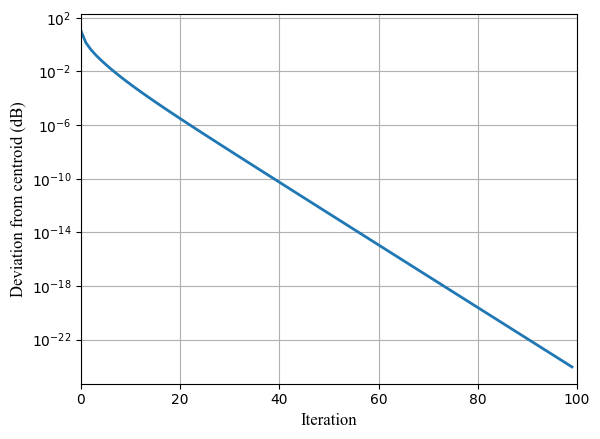

In [167]:
plt.figure()
plt.semilogy(range(nr_iterations), np.mean(errors, axis=0), linewidth=2)
plt.xlabel('Iteration',fontsize=12,fontname='times new roman' )
plt.ylabel('Deviation from centroid (dB)',fontsize= 12,fontname='times new roman' )
plt.xlim(0,nr_iterations)
plt.grid()
plt.show()

By varying the edge probability $p_{\mathrm{edge}}$, we note that increasing the edge probability results in a more connected grahp, which in turn results in a smaller second singular value (i.e., eigenvalue, since $A$ is symmetric), and hence faster rate of convergence.